# Ⅰ

## 1.2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("D:\study\Math\时间序列分析\Data\B1.xlsx", index_col=0)

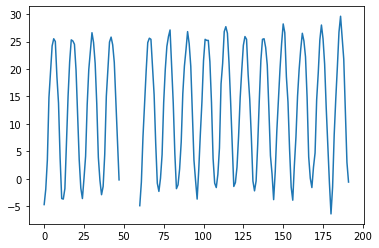

In [12]:
plt.plot(data.values.flatten())

显然周期是12. 简单填充当然是用平均值，略过。

In [102]:
def deposition_and_predition(Y):
    X = np.array([np.ones_like(Y), np.arange(len(Y))]).T

    Y_new = Y[~np.isnan(Y)].reshape(-1, 1)
    X_new = X[~np.isnan(Y)].reshape(-1, 2)

    beta = np.linalg.pinv(X_new.T @ X_new) @ X_new.T @ Y_new
    T = X_new @ beta
    S = Y_new - T

    S_intersection = S.reshape(-1, 12).mean(0).reshape(12, 1)
    T_intersection = X[np.isnan(Y)].reshape(-1, 2) @ beta
    Y_intersection = S_intersection + T_intersection
    
    Y_after = Y.copy()
    Y_after[np.isnan(Y)] = Y_intersection.flatten()
    
    return Y_after

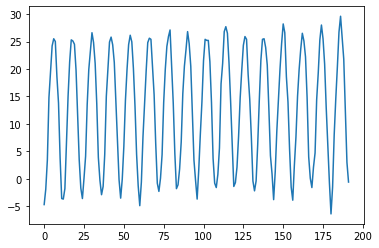

In [103]:
# Show
Y = data.values.flatten()
Y_after = deposition_and_predition(Y)
plt.plot(Y_after)
plt.show()

In [97]:
# B2
data_2 = pd.read_excel("D:\study\Math\时间序列分析\Data\B2.xlsx", index_col=0)

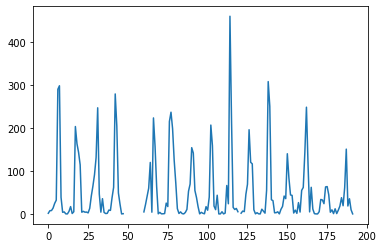

In [100]:
plt.plot(data_2.values.flatten())

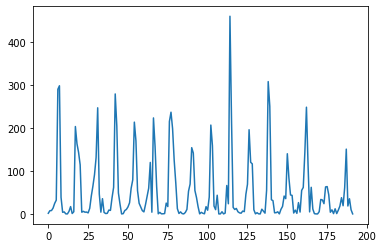

In [108]:
# Show
data_2.loc[1995, 1] = data_2[1].mean()
Y_2 = data_2.values.flatten()
Y_after = deposition_and_predition(Y_2)
plt.plot(Y_after)
plt.show()

## 1.3

In [109]:
data_3 = pd.read_excel("D:\study\Math\时间序列分析\Data\B6.xlsx", index_col=0)

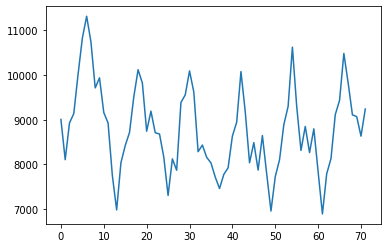

In [114]:
plt.plot(data_3.values.flatten())

周期12月

In [138]:
def deposition_and_predition_2(Y):
    X = np.array([np.ones_like(Y), np.arange(len(Y)), np.arange(len(Y))**2]).T

    beta = np.linalg.pinv(X.T @ X) @ X.T @ Y
    T = X @ beta
    S_raw = Y - T
    S = np.tile(S_raw.reshape(-1, 12).mean(0), len(Y)//12)
    R = (S_raw - S).flatten()
    return T, S, R

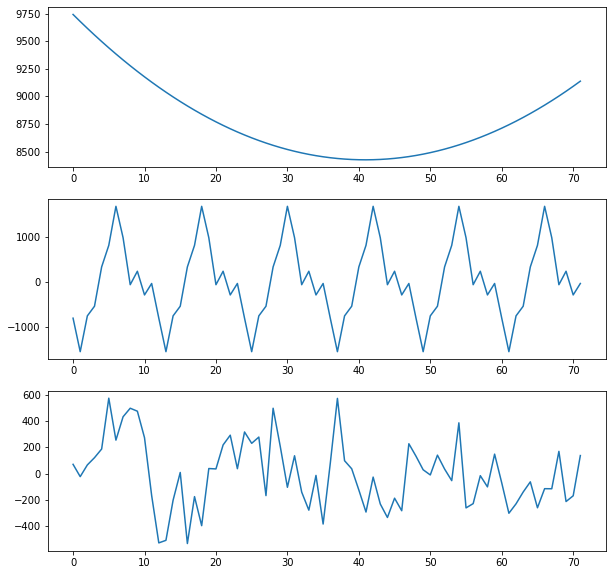

In [139]:
Y_3 = data_3.values.flatten()
T, S, R = deposition_and_predition_2(Y_3)

_, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(T)
ax[1].plot(S)
ax[2].plot(R)
plt.show()

## 1.4

(1)

若不然，存在集合$A$使得$P(\xi \in A) > 0$, 则：
$$
E|\xi| \ge E[|\xi|; A] > 0
$$

(2)

$$
Var(\xi) = E(\xi - E\xi)^2 = E\xi^2 - (E\xi)^2
$$

故$Var(\xi) = 0$当且仅当$E\xi^2 = m^2$, 即$\xi$为常数.

而根据holder不等式：
$$
E|\xi| \le \sqrt{E\xi^2}
$$
且取等当且仅当$\xi$几乎处处为常数.

故原命题得证。

（3）

若不然，存在$\epsilon >0$使得$P(|\xi| = \infty) = \epsilon$, 则：

$$
E|\xi| \ge E[|\xi|; |\xi| = \infty] = \infty
$$

矛盾。

（4）

\begin{aligned}
E|\xi|^\alpha &= E[|\xi|^\alpha; |\xi| \ge \epsilon] + E[|\xi|^\alpha; |\xi| < \epsilon] \\
&\ge \epsilon^\alpha P(|\xi| \ge \epsilon) + 0 \\
&= \epsilon^\alpha P(|\xi| \ge \epsilon)
\end{aligned}

## 2.1

只需求自协方差函数即可。

实际上：

$$
E[(X_t - \mu)(X_s - \mu)] = E[X_tX_s] - \mu^2 = b_{t-s} - \mu^2
$$

## 2.3

只需证$X_n$被$X_1, \cdots, X_{n-1}$线性表示。

由于自协方差矩阵退化，故存在非零向量$u = (u_1, \cdots, u_n)$使得：

$$
\sum_{i=1}^n \sum_{j=1}^n u_i u_j E[(X_i - \mu)(X_j - \mu)] = 0 \\
E[\sum_{i=1}^n u_i(X_i - \mu) \sum_{j=1}^n u_j(X_j - \mu)] = 0 \\
E[(\sum_{i=1}^n u_i(X_i - \mu))^2] = 0
$$

即：

$$
\sum_{i=1}^n u_i(X_i - \mu) = 0
$$

再一个一个递推归纳即可。

## 2.4

沿右上到左下的对角线对称。

## 3.3

1、二阶矩有限显然。

2、均值一致显然。

3、自协方差函数：

$$
\tilde \gamma_{i-j} = 
\begin{cases}
\gamma_{\frac{i-j}{2}}, & i - j 为偶数 \\
\gamma_{\frac{i-j-1}{2}}, & i - j 为奇数
\end{cases}
$$

故为平稳序列。

## 3.4



\begin{aligned}
\rho(t,s) &= \frac{Cov(X_t, X_s)}{\sqrt{Var(X_t)Var(X_s)}} \\
&= \frac{Cov(X_s + \sum_{k=s+1}^{t} \epsilon_k, X_s)}{\sqrt{Var(\sum_{k=1}^{t} \epsilon_k)Var(\sum_{k=1}^{s} \epsilon_k)}} \\
&= \frac{\gamma_0}{\sqrt{ts}\sigma^2}\end{aligned}

# Ⅱ

(1)

$$
\forall |s| < 1, 1 + b_1 s + b_2 s^2 \ne 0
$$

若$b_2 > 0 $ 且 $|\frac{b_1}{2b_2}| < 1$，
则$b_1^2 - 4 b_2 < 0$。即$-2\min{\{b_2, \sqrt{b_2}\}} < b_1 < 2\min{\{b_2, \sqrt{b_2}\}}$。

若$b_2 = 0$，则$b_1 \ne \frac{1}{s}, \forall 0 < |s| < 1$，即$-1 \le b_1 \le 1$。

若$b_2 < 0$，则$1-b_1+b_2 \ge 0, 1+b_1-b_2 \ge 0$

(2)

不妨设$t\ge s$:

\begin{aligned}
\gamma(t,s) &= Cov(b_t, b_s) \\
&= Cov(\epsilon_t + b_1 \epsilon_{t-1} + b_2 \epsilon_{t-2}, \epsilon_s + b_1 \epsilon_{s-1} + b_2 \epsilon_{s-2}) \\
&=
\begin{cases}
(1+b_1^2+b_2^2)\sigma^2, & t = s \\
(b_1 + b_1 b_2) \sigma^2, & t = s + 1 \\
b_2 \sigma^2, & t = s + 2 \\
0, & t > s + 2
\end{cases}
\end{aligned}

\begin{aligned}
\rho(t,s) &= \frac{\gamma(t,s)}{\sqrt{\gamma(t,t)\gamma(s,s)}} \\
&=
\begin{cases}
1, & t = s \\
\frac{b_1 + b_1 b_2}{1+b_1^2+b_2^2}, & t = s + 1 \\
\frac{b_2}{1+b_1^2+b_2^2}, & t = s + 2 \\
0, & t > s + 2
\end{cases}
\end{aligned}

# Ⅲ

\begin{aligned}
\frac{1}{(1-0.5L)^2 (1-0.4L)} &= \frac{A}{(1-0.5L)} + \frac{B}{(1-0.5L)^2} + \frac{C}{(1-0.4L)} \\
\end{aligned}

故：

$$
B = \frac{1}{(1-0.4L)} \large{|}_{L=2} = 5 \\
C = \frac{1}{(1-0.5L)^2} \large{|}_{L=\frac{5}{2}} = 16 \\
A = 1 - B - C = -20
$$

# Ⅳ

\begin{aligned}
\rho(t, s) &= \frac{\gamma(t, s)}{\sqrt{\gamma(t, t)\gamma(s, s)}} \\
&= \frac{Cov(U\cos(wt) + V\sin(wt), U\cos(ws) + V\sin(ws))}{\sqrt{Var(U\cos(wt) + V\sin(wt))Var(U\cos(ws) + V\sin(ws))}} \\
&= \frac{\delta^2 (\cos(wt) \cos(ws) + \sin(wt) \sin(ws))}{\sqrt{\delta^2(\cos^2(wt) + \sin^2(wt))\delta^2(\cos^2(ws) + \sin^2(ws))}} \\
&= \cos(w(t-s))
\end{aligned}